In [1]:
import gravipy
import numpy as np
import matplotlib.pyplot
import sympy
from scipy.integrate import odeint
from sympy import lambdify
from sympy.abc import a,b
gravipy.init_printing()

/Users/michiotanaka/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
t, m,r,theta,phi,tau = gravipy.symbols('t M r \\theta \phi \\tau')

In [3]:
x = gravipy.Coordinates('\chi', [t, r, theta, phi])
Metric = gravipy.diag(-(1-2*m/r), 1/(1-2*m/r), r**2, r**2*gravipy.sin(theta)**2)
Metric2D = gravipy.diag(-(1-2*m/r), 1/(1-2*m/r), r**2, r**2)
Metric_weak = gravipy.diag(-(1+2*m/r), (1+2*m/r), (1+2*m/r), (1+2*m/r))

In [4]:
g = gravipy.MetricTensor('g', x, Metric2D)


In [5]:
#Ga = gravipy.Christoffel('Ga', g)

In [6]:
#Ga(gravipy.All,gravipy.All,gravipy.All)

In [7]:
w = gravipy.Geodesic('w', g, tau)
w(gravipy.All)

ValueError: 
\left[\begin{smallmatrix}- \frac{2 M \frac{d}{d \tau} r{\left (\tau \right )}}{r^{2}{\left (\tau \right )}} \frac{d}{d \tau} t{\left (\tau \right )} + \left(\frac{2 M}{r{\left (\tau \right )}} - 1\right) \frac{d^{2}}{d \tau^{2}}  t{\left (\tau \right )} & \frac{M \left(\frac{d}{d \tau} t{\left (\tau \right )}\right)^{2}}{r^{2}{\left (\tau \right )}} - \frac{M \left(\frac{d}{d \tau} r{\left (\tau \right )}\right)^{2}}{\left(- \frac{2 M}{r{\left (\tau \right )}} + 1\right)^{2} r^{2}{\left (\tau \right )}} - r{\left (\tau \right )} \left(\frac{d}{d \tau} \phi{\left (\tau \right )}\right)^{2} - r{\left (\tau \right )} \left(\frac{d}{d \tau} \theta{\left (\tau \right )}\right)^{2} + \frac{\frac{d^{2}}{d \tau^{2}}  r{\left (\tau \right )}}{- \frac{2 M}{r{\left (\tau \right )}} + 1} & r^{2}{\left (\tau \right )} \frac{d^{2}}{d \tau^{2}}  \theta{\left (\tau \right )} + 2 r{\left (\tau \right )} \frac{d}{d \tau} \theta{\left (\tau \right )} \frac{d}{d \tau} r{\left (\tau \right )} & r^{2}{\left (\tau \right )} \frac{d^{2}}{d \tau^{2}}  \phi{\left (\tau \right )} + 2 r{\left (\tau \right )} \frac{d}{d \tau} \phi{\left (\tau \right )} \frac{d}{d \tau} r{\left (\tau \right )}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡                                                                             
⎢                                                                             
⎢        d              d                                               ⎛  d  
⎢  2⋅M⋅─────(r(\tau))⋅─────(t(\tau))                    2             M⋅⎜─────
⎢      d\tau          d\tau            ⎛  2⋅M      ⎞   d                ⎝d\tau
⎢- ───────────────────────────────── + ⎜─────── - 1⎟⋅──────(t(\tau))  ────────
⎢                2                     ⎝r(\tau)    ⎠      2                  2
⎢               r (\tau)                             d\tau                  r 
⎢                                                                             
⎣                                                                             

                                                                              
          2                        2                                          
         ⎞         ⎛  d           ⎞                

In [ ]:
print w(gravipy.All)

In [ ]:
w(1)

In [8]:
expression = sympy.Eq(w(1),0)
print expression.free_symbols

set([\tau, M])


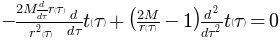

In [9]:
expression.subs((m,5),(tau,6))


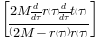

In [10]:
sympy.solve(sympy.Eq(w(1),0),sympy.Derivative(t(tau),tau,tau))

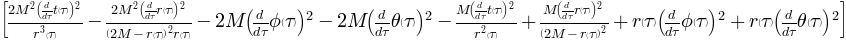

In [11]:
sympy.solve(sympy.Eq(w(2),0),sympy.Derivative(r(tau),tau,tau))

In [12]:
def lamb(func,symb=t):
    #arglist = (m,t,r,phi,theta,sympy.Derivative(t(tau),tau),sympy.Derivative(r(tau),tau),sympy.Derivative(phi(tau),tau),sympy.Derivative(theta(tau),tau))
    arglist = (m,t,r,phi,theta,A,B,C)
    eq = sympy.solve(sympy.Eq(func,0),sympy.Derivative(symb(tau),tau,tau))[0]
    return lambdify(arglist, eq, modules="numpy")

In [13]:
w1 = lamb(w(1),t)

NameError: global name 'A' is not defined

In [14]:
sympy.solve(w(1),sympy.Derivative(t(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):2,sympy.Derivative(t(tau),tau):3,sympy.Derivative(r(tau),tau):5,sympy.Derivative(t(tau),tau):7,t(tau):8,r(tau):9,phi(tau):2,theta(tau):3,m:4})

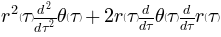

In [20]:
w(3)

In [16]:
array = np.zeros(9)
d2t = lambda x: sympy.solve(w(1),sympy.Derivative(t(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):x[0],sympy.Derivative(r(tau),tau):x[1],sympy.Derivative(phi(tau),tau):x[2],sympy.Derivative(theta(tau),tau):x[3],t(tau):x[4],r(tau):x[5],phi(tau):x[6],theta(tau):x[7],m:x[8]})
d2r = lambda x: sympy.solve(w(2),sympy.Derivative(r(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):x[0],sympy.Derivative(r(tau),tau):x[1],sympy.Derivative(phi(tau),tau):x[2],sympy.Derivative(theta(tau),tau):x[3],t(tau):x[4],r(tau):x[5],phi(tau):x[6],theta(tau):x[7],m:x[8]})
d2phi = lambda x: sympy.solve(w(3),sympy.Derivative(theta(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):x[0],sympy.Derivative(r(tau),tau):x[1],sympy.Derivative(phi(tau),tau):x[2],sympy.Derivative(theta(tau),tau):x[3],t(tau):x[4],r(tau):x[5],phi(tau):x[6],theta(tau):x[7],m:x[8]})
d2theta = lambda x: sympy.solve(w(4),sympy.Derivative(phi(tau),tau,tau))[0].subs({sympy.Derivative(t(tau),tau):x[0],sympy.Derivative(r(tau),tau):x[1],sympy.Derivative(phi(tau),tau):x[2],sympy.Derivative(theta(tau),tau):x[3],t(tau):x[4],r(tau):x[5],phi(tau):x[6],theta(tau):x[7],m:x[8]})

In [17]:
print d2t([1,2,3,4,5,6,7,8,9])
print d2r([1,2,3,4,5,6,7,8,9])
print d2phi([1,2,3,4,5,6,7,8,9])
print d2theta([1,2,3,4,5,6,7,8,9])

1/2
-300
-8/3
-2


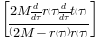

In [21]:
sympy.solve(w(1),sympy.Derivative(t(tau),tau,tau))

In [ ]:
def geo(x, tau):
    '''
    x[0] = t
    x[1] = r
    x[2] = phi
    x[3] = theta
    x[4] = dt dtau
    x[5] = dr dtau
    x[6] = dphi dtau
    x[7] = dtheta dtau
    '''
    M=5
    dxdtau = np.zeros_like(x)
    dxdtau[0] = x[4]
    dxdtau[1] = x[5]
    dxdtau[2] = x[6]
    dxdtau[3] = x[7]
    dxdtau[4] = d2t(np.append(x, M))
    dxdtau[5] = d2r(np.append(x, M))
    dxdtau[6] = d2phi(np.append(x, M))
    dxdtau[7] = d2theta(np.append(x, M))
    return dxdtau

In [ ]:
tau = np.linspace(0,100)
x0_ = np.array([1,2,3,4,5,6,7,8])
x_ = odeint(geo, x0_, tau)